# 1. 불량 검출 프로젝트 

### 스마트 팩토리 
- 정보통신기술(ICT)와 자동화 기술을 활용하여 제조 과정의 효율성을 극대화한 공장 
- IoT(사물 인터넷), AI(인공지능), 빅데이터 등을 사용해 생산 과정의 실시간 모니터링과 최적화를 통해 생산성을 높이고 품질 관리를 향상

In [1]:
!pip install kaggle

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [2]:
!pip install unzip

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [3]:
!kaggle datasets download -d ravirajsinh45/real-life-industrial-dataset-of-casting-product

/Users/gyomgyom/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(
Dataset URL: https://www.kaggle.com/datasets/ravirajsinh45/real-life-industrial-dataset-of-casting-product
License(s): Attribution-NonCommercial-NoDerivatives 4.0 International (CC BY-NC-ND 4.0)
real-life-industrial-dataset-of-casting-product.zip: Skipping, found more recently modified local copy (use --force to force download)


In [4]:
!unzip -q real-life-industrial-dataset-of-casting-product.zip

replace casting_512x512/casting_512x512/def_front/cast_def_0_0.jpeg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [5]:
# 실습 결과
# GT:OK, Predict: OK
# GT:NG, Predict: NG

In [1]:
!pip install matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [53]:
import os
import glob
import random
import cv2
import matplotlib.pyplot as plt
import string
import shutil
import torch
from torchvision import transforms
from PIL import Image

In [3]:
data_root = '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project'
ori_folder = f'{data_root}/test'
save_folder = f'{data_root}/new'

if not os.path.exists(save_folder):
    os.mkdir(save_folder) 

In [4]:
file_list = glob.glob(f'{ori_folder}/*/*')

In [51]:
file_list

['/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_9975.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_2840.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_1368.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_2694.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_9934.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_2801.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_2769.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_1145.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/test/ok_front/cast_ok_0_5805.jpeg',
 '/Users/gyomgyom/Documents/컴퓨터비전 프로ᄌ

OQ09C60C


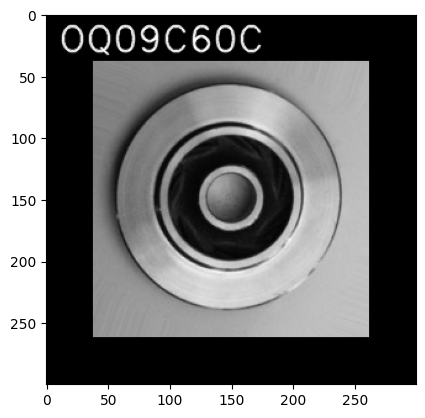

True

In [5]:
file_path = file_list[0]
ori_img = cv2.imread(file_path)
ori_img = cv2.resize(ori_img, (224,224))
# 이미지를 주어진 크기만큼 테두리를 추가 
new_img = cv2.copyMakeBorder(ori_img, 38, 38, 38, 38, cv2.BORDER_CONSTANT, value=(0,0,0))

# 대문자 알파벳(A-Z) 포함하는 문자열, 숫자(0-9)를 포함하는 문자열 들을 조합하여 무작위 요소를 생성
ID_LIST = [random.choice(string.ascii_uppercase + string.digits) for _ in range(8)]
ID = ''.join(ID_LIST)
print(ID)
new_img = cv2.putText(new_img, ID, (10, 30), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
plt.figure()
plt.imshow(new_img)
plt.show()

new_path = file_path.replace('ok_front/','').replace('def_front/','').replace('test', 'new')
cv2.imwrite(new_path, new_img)

In [6]:
new_path

'/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/new/cast_ok_0_9975.jpeg'

In [7]:
for file_path in file_list: 
    ori_img = cv2.imread(file_path)
    ori_img = cv2.resize(ori_img, (224,224))
    new_img = cv2.copyMakeBorder(ori_img, 38, 38, 38, 38, cv2.BORDER_CONSTANT, value=(0,0,0))
    
    ID_LIST = [random.choice(string.ascii_uppercase + string.digits) for _ in range(8)]
    ID = ''.join(ID_LIST)
    new_img = cv2.putText(new_img, ID, (10, 30), cv2.FONT_HERSHEY_DUPLEX, 1, (255,255,255), 1, cv2.LINE_AA)
  
    new_path = file_path.replace('ok_front/','').replace('def_front/','').replace('test', 'new')
    cv2.imwrite(new_path, new_img)

# **2. OCR(광학 문자 인식 : Optical Character Recognition)**
- 영상이나 문서에서 텍스트를 자동으로 인식하고 컴퓨터가 이행할 수 있는 텍스트 데이터로 변환하는 프로세스
- Tesseract, EasyOCR, PaddleOCR, CLOVA OCR(네이버 API), Cloud Vision(구글 API) ..

#kor 데이터 다운로드
https://tesseract-ocr.github.io/tessdoc/Data-Files.html 에서 korean 찾아 클릭하여 다운로드

### 테서랙트
- 오픈 소스 OCR 라이브러리로 구글에서 개발하고 현재는 어떤 여러 커뮤티니에 의해 유지보수
- [깃허브](https://github.com/UB-Mannheim/tesseract/wiki).
- 깃허브에는 window 전용만 나와있기 때문에 맥북은 터미널을 키고 homebrew를 이용해 설치해야한다.

In [11]:
#이것만 해주면 영어 OCR은 된다. 한국어는 안됨
!brew install tesseract
!pip install tesseract
!pip install pillow  # 이미지 분석, 처리 라이브러리

==> Downloading https://formulae.brew.sh/api/formula.jws.json
==> Downloading https://formulae.brew.sh/api/cask.jws.json
To reinstall 5.5.0, run:
  brew reinstall tesseract
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip
Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [12]:
!pip install opencv-python

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [13]:
!pip install numpy

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [14]:
import cv2
import pytesseract

In [15]:
img = cv2.imread('./sample.png')
dst = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# Long - 'kor', Long-'eng', Long-'kor_eng' -> 읽어올 언어 설정
text = pytesseract.image_to_string(dst, lang = 'eng')
print(text)

Tesseract sample



In [16]:
# 한국어 설정하기 
!brew list tesseract

/opt/homebrew/Cellar/tesseract/5.5.0/bin/.DS_Store
/opt/homebrew/Cellar/tesseract/5.5.0/bin/ambiguous_words
/opt/homebrew/Cellar/tesseract/5.5.0/bin/classifier_tester
/opt/homebrew/Cellar/tesseract/5.5.0/bin/cntraining
/opt/homebrew/Cellar/tesseract/5.5.0/bin/combine_lang_model
/opt/homebrew/Cellar/tesseract/5.5.0/bin/combine_tessdata
/opt/homebrew/Cellar/tesseract/5.5.0/bin/dawg2wordlist
/opt/homebrew/Cellar/tesseract/5.5.0/bin/image/testimage.png
/opt/homebrew/Cellar/tesseract/5.5.0/bin/img_1.txt
/opt/homebrew/Cellar/tesseract/5.5.0/bin/img_2.txt
/opt/homebrew/Cellar/tesseract/5.5.0/bin/img_3.txt
/opt/homebrew/Cellar/tesseract/5.5.0/bin/lstmeval
/opt/homebrew/Cellar/tesseract/5.5.0/bin/lstmtraining
/opt/homebrew/Cellar/tesseract/5.5.0/bin/merge_unicharsets
/opt/homebrew/Cellar/tesseract/5.5.0/bin/mftraining
/opt/homebrew/Cellar/tesseract/5.5.0/bin/set_unicharset_properties
/opt/homebrew/Cellar/tesseract/5.5.0/bin/shapeclustering
/opt/homebrew/Cellar/tesseract/5.5.0/bin/tesseract
/opt

In [ ]:
#kor 데이터 다운로드
# https://tesseract-ocr.github.io/tessdoc/Data-Files.html 에서 korean 찾아 클릭하여 다운로드
# 다운로드후 같은 경로에 tessdata 파일안으로 넣어줘야함 ( 없으면 파일 만들어야함 ) 

In [ ]:
# mac은 터미널을 키고 아래의 과정을 따라 ocr을 뽑아낼수 있다. 
% homebrew install tesseract
% brew install tesseract
% brew install tesseract-lang
% tesseract --list-langs
% pip install pytesseract
% brew list tesseract
# 경로 확인 후 
% cd /opt/homebrew/Cellar/tesseract/5.5.0/bin
% tesseract --dpi 300 ./image/testimage.png stdout -l eng > img_1.txt # 그럼 결과 파일이 생성 

In [17]:
data_root = '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project'
ori_folder = f'{data_root}/test'
save_folder = f'{data_root}/new'

In [18]:
file_list = glob.glob(f'{save_folder}/*')
random.seed(2024)
random.shuffle(file_list)

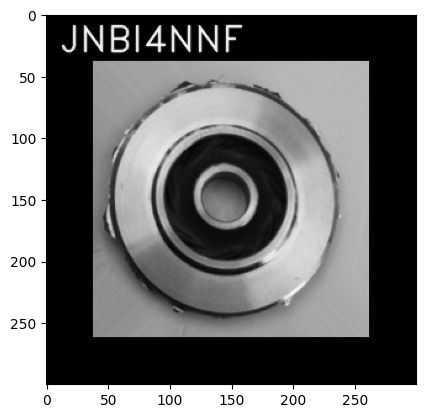

In [19]:
file_path = file_list[0]
ori_img = cv2.imread(file_path)
ori_img = cv2.cvtColor(ori_img, cv2.COLOR_BGR2RGB)

text = pytesseract.image_to_string(ori_img,lang='eng')
ID = text[:8]
print(ID)

plt.figure()
plt.imshow(ori_img)
plt.show()

#이미지 크롭
defect_area = ori_img[38:38+224, 38:38+224, :]
img = Image.fromarray(defect_area).convert('RGB')

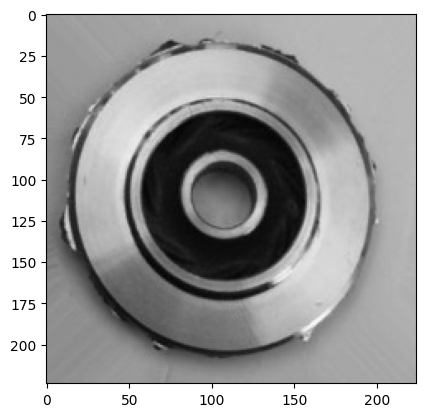

In [20]:
plt.figure()
plt.imshow(img)
plt.show()

In [21]:
data_root = '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project'
file_root = '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/real-life-industrial-dataset-of-casting-product/casting_512x512/casting_512x512/'
project_name = 'defect_detection'
train_file_root = f'{data_root}/{project_name}'
train_root = f'{data_root}/{project_name}/train'
valid_root = f'{data_root}/{project_name}/valid'
test_root = f'{data_root}/{project_name}/test'

cls_list = os.listdir(file_root)

for folder in [train_root, valid_root, test_root]:
    if not os.path.exists(folder):
        os.makedirs(folder)
    for cls in cls_list:
        cls_folder = f'{folder}/{cls}'
        if not os.path.exists(cls_folder):
            os.makedirs(cls_folder)
         
        


In [22]:
random.seed(2024)

#맨날 써먹는것!! 
for cls in cls_list:
    file_list = os.listdir(f'{file_root}/{cls}')
    random.shuffle(file_list)
    test_ratio = 0.1
    num_file = len(file_list)

    test_list = file_list[:int(num_file*test_ratio)]
    valid_list = file_list[int(num_file*test_ratio):int(num_file*test_ratio)*2]
    train_list = file_list[int(num_file*test_ratio)*2:]

    for i in test_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{test_root}/{cls}/{i}')

    for i in valid_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{valid_root}/{cls}/{i}')

    for i in train_list:
        shutil.copyfile(f'{file_root}/{cls}/{i}', f'{train_root}/{cls}/{i}')


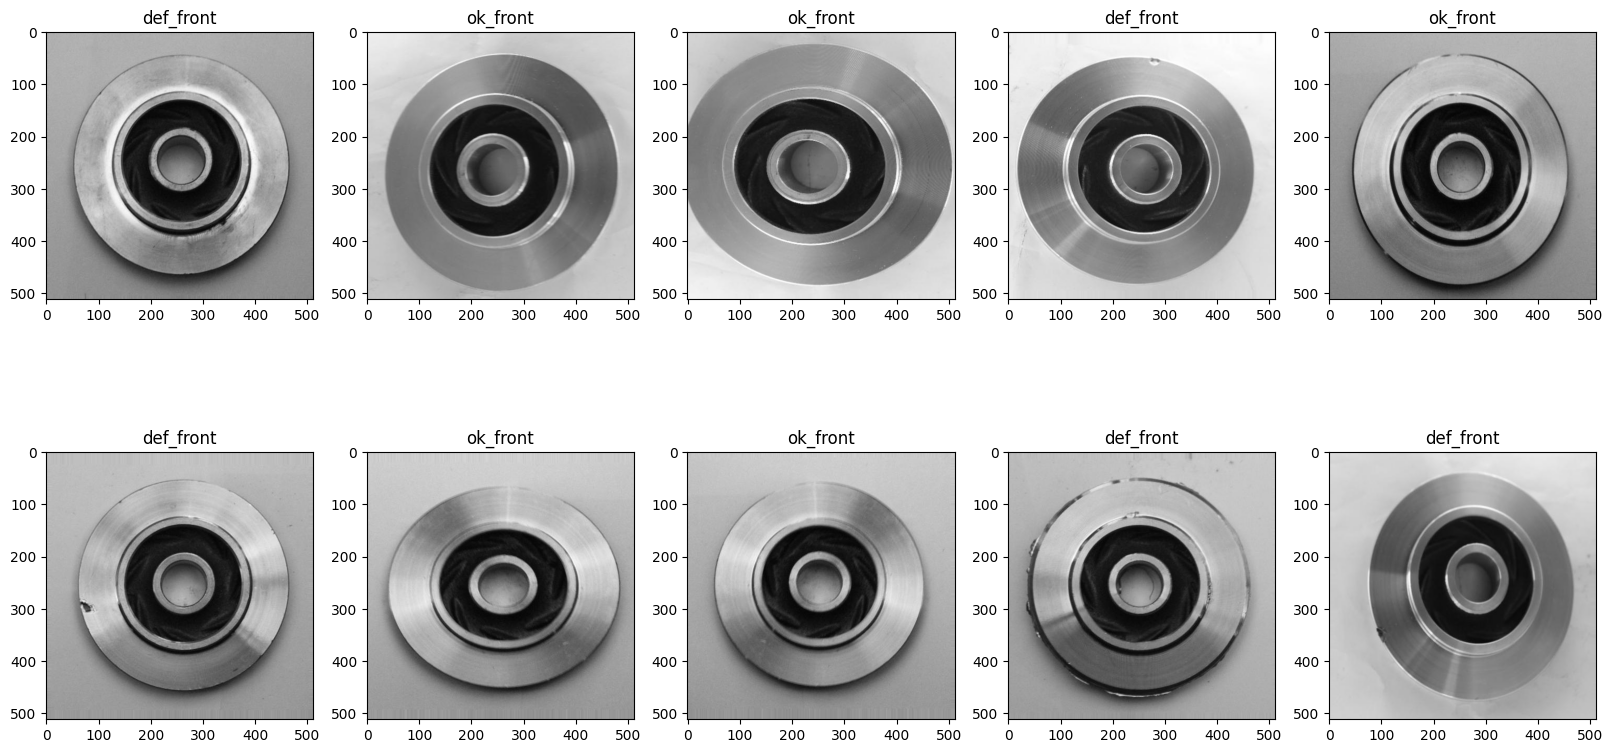

In [23]:
import matplotlib.pyplot as plt
import glob
from PIL import Image

test_file_list = glob.glob(f"{test_root}/*/*")
random.shuffle(test_file_list)

plt.figure(figsize = (20,10))
for i in range(10):
    test_img_path = os.path.join(test_root, test_file_list[i])
    ori_img = Image.open(test_img_path).convert('RGB')
    plt.subplot(2, 5, (i+1))
    plt.title(test_file_list[i].split('/')[-2])
    plt.imshow(ori_img)

plt.show()

In [24]:
project_root = '/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection'

In [25]:
import yaml
data = dict()

data['train'] = train_root
data['val'] = valid_root
data['test'] = test_root
data['nc'] = len(cls_list)
data['names'] = cls_list

with open(f'{project_root}/defect_detection.yaml', 'w' ) as f:
    yaml.dump(data,f)

In [26]:
%cd /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection

/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection


/Users/gyomgyom/Library/Python/3.9/lib/python/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [27]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [28]:
from ultralytics import YOLO

/Users/gyomgyom/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [37]:
model = YOLO ('yolov8s-cls.yaml')

YOLOv8s-cls summary: 56 layers, 6,361,736 parameters, 6,361,736 gradients, 13.6 GFLOPs


In [38]:
results = model.train(data=f'{project_root}', epochs=20, batch=8, imgsz=224, name='defect_detection_s')

Ultralytics 8.3.82 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M3 Pro)
engine/trainer: task=classify, mode=train, model=yolov8s-cls.yaml, data=/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection, epochs=20, time=None, patience=100, batch=8, imgsz=224, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=defect_detection_s, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, 


val: Scanning /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Fin

optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 26 weight(decay=0.0), 27 weight(decay=0.0005), 27 bias(decay=0.0)
Image sizes 224 train, 224 val
Using 0 dataloader workers
Logging results to /Users/gyomgyom/runs/classify/defect_detection_s
Starting training for 20 epochs...

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.659          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.651          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.667          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.605          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.721          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.744          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.767          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.705          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.612          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.605          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.736          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.791          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.806          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.605          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.829          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.837          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.845          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.845          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.876          1

      Epoch    GPU_mem       loss  Instances       Size




               classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.837          1

20 epochs completed in 0.145 hours.
Optimizer stripped from /Users/gyomgyom/runs/classify/defect_detection_s/weights/last.pt, 10.3MB
Optimizer stripped from /Users/gyomgyom/runs/classify/defect_detection_s/weights/best.pt, 10.3MB

Validating /Users/gyomgyom/runs/classify/defect_detection_s/weights/best.pt...
Ultralytics 8.3.82 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M3 Pro)


YOLOv8s-cls summary (fused): 30 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
WARNING ⚠️ Dataset 'split=val' not found, using 'split=test' instead.
train: /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection/train... found 1042 images in 2 classes ✅ 
val: None...
test: /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection/test... found 129 images in 2 classes ✅ 



              classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,

                   all      0.876          1
Speed: 0.0ms preprocess, 22.0ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/gyomgyom/runs/classify/defect_detection_s


In [39]:
model = YOLO('/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/runs/classify/defect_detection_s/weights/best.pt')
metrics = model.val(split='test')
print('top1 accuracy: ', metrics.top1)
print('top5 accuracy: ', metrics.top5)

Ultralytics 8.3.82 🚀 Python-3.9.6 torch-2.6.0 CPU (Apple M3 Pro)
YOLOv8s-cls summary (fused): 30 layers, 5,077,762 parameters, 0 gradients, 12.4 GFLOPs
train: /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection/train... found 1042 images in 2 classes ✅ 
val: None...
test: /Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection/test... found 129 images in 2 classes ✅ 




              classes   top1_acc   top5_acc: 100%|██████████| 9/9 [00:03<00:00,/Fi

                   all      0.876          1
Speed: 0.0ms preprocess, 22.5ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /Users/gyomgyom/runs/classify/val
top1 accuracy:  0.8759689927101135
top5 accuracy:  1.0


In [42]:
test_root = f'/Users/gyomgyom/Documents/컴퓨터비전 프로젝트/CV_2/Final project/defect_detection/test'
test_file_list = glob.glob(f'{test_root}/*/*.jpeg')
random.shuffle(test_file_list)

In [50]:
IMG_SIZE = (224,224)
test_data_transform = transforms.Compose([
    transforms.Resize(IMG_SIZE),
    transforms.ToTensor()
])


0: 224x224 ok_front 0.92, def_front 0.08, 28.0ms
Speed: 0.1ms preprocess, 28.0ms inference, 0.5ms postprocess per image at shape (1, 3, 224, 224)


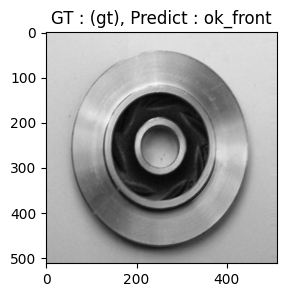

In [54]:
img = Image.open(test_file_list[0]).convert('RGB')
img_src = test_data_transform(img)
x_tensor = img_src.unsqueeze(0)
result = model(x_tensor)[0]

gt = test_file_list[0].split('/')[-1]
pt = model.names[torch.argmax(result.probs.data).item()]

plt.figure(figsize=(3,3))
plt.title(f"GT : (gt), Predict : {pt}")
plt.imshow(img)
plt.show()


0: 224x224 ok_front 0.92, def_front 0.08, 19.2ms
Speed: 0.1ms preprocess, 19.2ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 ok_front 0.90, def_front 0.10, 65.4ms
Speed: 0.1ms preprocess, 65.4ms inference, 0.3ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 ok_front 0.76, def_front 0.24, 9.1ms
Speed: 0.0ms preprocess, 9.1ms inference, 0.4ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 def_front 0.87, ok_front 0.13, 12.2ms
Speed: 0.0ms preprocess, 12.2ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)

0: 224x224 ok_front 0.94, def_front 0.06, 9.3ms
Speed: 0.0ms preprocess, 9.3ms inference, 0.2ms postprocess per image at shape (1, 3, 224, 224)


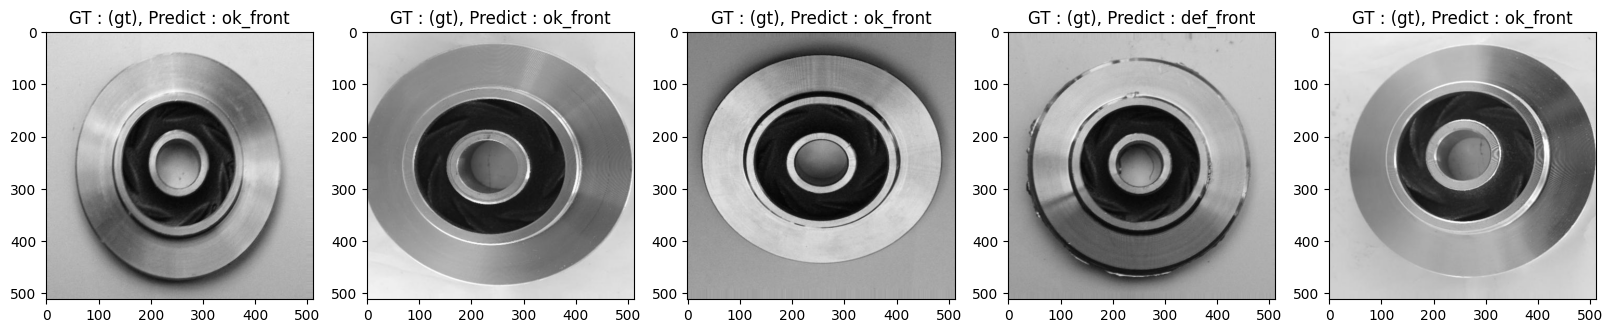

In [55]:
plt.figure(figsize=(20,5))

for idx in range(5):
    img = Image.open(test_file_list[idx]).convert('RGB')
    img_src = test_data_transform(img)
    x_tensor = img_src.unsqueeze(0)
    result = model(x_tensor)[0]
    
    gt = test_file_list[idx].split('/')[-1]
    pt = model.names[torch.argmax(result.probs.data).item()]
    
    plt.subplot(1, 5, (idx+1))
    plt.title(f"GT : (gt), Predict : {pt}")
    plt.imshow(img)
plt.show()